In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
data=pd.read_csv('../input/iris/Iris.csv')

In [2]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.shape

(150, 6)

In [4]:
data=data.drop(columns='Id',axis=1)

In [5]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


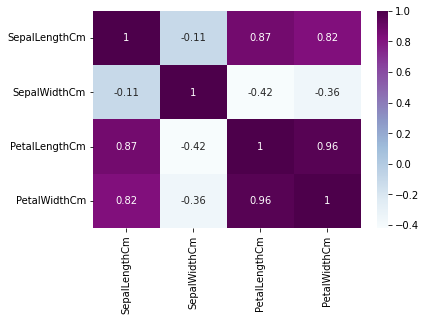

In [8]:
sns.heatmap(data.corr(),annot=True,cmap='BuPu')
plt.show()

In [9]:
data.tail(1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
149,5.9,3.0,5.1,1.8,Iris-virginica


In [11]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [13]:
data['Species']=data['Species'].map({'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2})
data['Species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [14]:
data['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [15]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
x=data.drop(columns='Species')
y=data['Species']

In [20]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64

In [27]:
from sklearn.preprocessing import MinMaxScaler

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [26]:
lr=LogisticRegression(max_iter=75,multi_class='multinomial')
svm=SVC()
rfg=RandomForestClassifier(n_estimators=150)
xgb=XGBClassifier(n_estimators=80,learning_rate=0.01)
light=LGBMClassifier()
cat=CatBoostClassifier(iterations=500,learning_rate=0.01)

In [29]:
clf={
    
    'Logistic Regression':lr,
    'Support Vector Machine':svm,
    'Random Forest':rfg,
    'Xg Boost':xgb,
    'Light GBM':light,
    'Cat Boost':cat
    
    
}

In [30]:
print(clf)

{'Logistic Regression': LogisticRegression(max_iter=75, multi_class='multinomial'), 'Support Vector Machine': SVC(), 'Random Forest': RandomForestClassifier(n_estimators=150), 'Xg Boost': XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=80, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=None,
              reg_alpha=None, reg_lambda=None, ...), 'Light GBM': LGBMClassifier(), 'Cat Boost': <catboost.core.CatBoostClas

In [35]:
clf.keys()

dict_keys(['Logistic Regression', 'Support Vector Machine', 'Random Forest', 'Xg Boost', 'Light GBM', 'Cat Boost'])

In [38]:
def classify(x,y):
    scaler=MinMaxScaler()
    x=scaler.fit_transform(x)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
    
    for key in clf.keys():
        clf[key].fit(x_train,y_train)
        y_pred=clf[key].predict(x_test)
        score=accuracy_score(y_test,y_pred)
    
        print(key,'------->>',score)

    

In [44]:
%%time
classify(x,y)

Logistic Regression ------->> 0.9333333333333333
Support Vector Machine ------->> 1.0
Random Forest ------->> 0.9777777777777777
Xg Boost ------->> 1.0
Light GBM ------->> 0.9777777777777777
0:	learn: 1.0872936	total: 697us	remaining: 348ms
1:	learn: 1.0768478	total: 1.3ms	remaining: 324ms
2:	learn: 1.0683353	total: 1.86ms	remaining: 308ms
3:	learn: 1.0601654	total: 2.43ms	remaining: 302ms
4:	learn: 1.0493253	total: 2.98ms	remaining: 295ms
5:	learn: 1.0380463	total: 3.54ms	remaining: 291ms
6:	learn: 1.0299910	total: 4.04ms	remaining: 284ms
7:	learn: 1.0204493	total: 4.44ms	remaining: 273ms
8:	learn: 1.0107229	total: 4.93ms	remaining: 269ms
9:	learn: 1.0014600	total: 5.42ms	remaining: 266ms
10:	learn: 0.9931152	total: 5.88ms	remaining: 261ms
11:	learn: 0.9845676	total: 6.28ms	remaining: 256ms
12:	learn: 0.9754708	total: 6.82ms	remaining: 255ms
13:	learn: 0.9682813	total: 7.33ms	remaining: 255ms
14:	learn: 0.9583193	total: 7.85ms	remaining: 254ms
15:	learn: 0.9499863	total: 8.34ms	remain

# Deployment

In [61]:
import warnings
warnings.filterwarnings('ignore')

In [47]:
pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 11.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.7 MB/s eta 0:00:00:00:01
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 41.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 3.6 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=e08abb05c0f345c4afff7702429c1e3aae4a86d97926377f88058269c3823a2d
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Create

In [64]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [65]:
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30)
y_pred=rfg.predict(x_test)
y_pred

array([2, 1, 2, 0, 1, 1, 2, 0, 2, 2, 1, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 2,
       0, 0, 2, 0, 0, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 2, 2, 0,
       0])

In [66]:
accuracy_score(y_test,y_pred)

1.0

In [48]:
import gradio as gr

In [67]:
def classes(num):
    if num<0.5:
        return 'Iris-setosa'
    if num<1.5:
        return 'Iris-versicolor'
    else:
        return 'Iris-verginica'

In [68]:
def predict_flower(sl,sw,pl,pw):
    input_array=np.array([[sl,sw,pl,pw]])
    y_pred=rfg.predict(input_array)
    output=classes(y_pred[0])
    if output=='Iris-setosa':
        return [(0,output)]
    elif output=='Iris-versicolor':
        return [(1,output)]
    else:
        return [(2,output)]

In [69]:
sl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="SepalLengthCm")
sw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="SepalWidthCm")
pl = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="PetalLengthCm")
pw = gr.inputs.Slider(minimum=0, maximum=7, default=2, label="PetalWidthCm")
op=gr.outputs.HighlightedText(color_map={ "Iris-setosa": "lightgreen",
        "Iris-versicolor": "pink",
        "Iris-virginica": "yellow",})

gr.Interface(predict_flower, inputs=[sl,sw,pl,pw], outputs=op,live=True).launch(share=True)

Running on local URL:  http://127.0.0.1:7861/
Running on public URL: https://53744.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)


(<gradio.routes.App at 0x7f99aa784950>,
 'http://127.0.0.1:7861/',
 'https://53744.gradio.app')